In [ ]:
import torch 

In [ ]:
from transformers import pipeline,SamModel, SamProcessor
generator = pipeline(
    task="mask-generation",
    model="facebook/sam-vit-base",
    processor="facebook/sam-vit-base",
    device=0,
    points_per_batch=256
)



In [ ]:
image_url = r"C:\Users\Aditya\Downloads\FN505-1.jpg"
outputs = generator(image_url, points_per_batch = 256)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Extract the first mask from the list
first_mask = outputs['masks'][0]
# Plot the mask
plt.figure(figsize=(6,6))
plt.imshow(first_mask, cmap='gray')  # Use a gray colormap to visualize the mask
plt.axis('off')  # Hide the axes
plt.show()

In [2]:
import torch
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline
from diffusers import AutoPipelineForInpainting

# Load the image and mask image
image_path = r"C:\Users\Aditya\Downloads\aura_stable_diffusion\wetransfer_org22052_1-jpg_2023-08-01_1525\OSN23013_2.jpg" # Update this path
mask_image_path = r"C:\Users\Aditya\Downloads\download.png" # Update this path

image = Image.open(image_path)
mask_image = Image.open(mask_image_path)



# Initialize the pipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")

blurred_mask = pipe.mask_processor.blur(mask_image, blur_factor=1)

# Provide your prompt
prompt = '''Careful composition in 4K accentuates opulent jewelry. Focused on the necklace, diamonds catch and reflect light, radiating a glow. 
Model's skin provides a warm backdrop, emphasizing the piece. Shallow depth of field ensures sharp focus on the necklace, with the background blurred,
drawing the viewer's eye to the jewelry.Do not change the desing.
'''
negative_prompt = "bad anatomy, deformed, ugly, disfigured"
# Run the inpainting pipeline
output = pipe(prompt=prompt,negative_prompt=negative_prompt,image=image, mask_image=blurred_mask,guidance_scale=7.5,num_inference_steps=250)
result_image = output.images[0]

# Save the result
save_path = r"C:\Users\Aditya\Downloads\jewellery22.png"  # Update this path if needed
result_image.save(save_path)

100%|██████████| 100/100 [00:23<00:00,  4.21it/s]


In [ ]:
import torch
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline

image_path = r"C:\Users\Aditya\Downloads\image_480.png" # Update this path
mask_image_path = r"C:\Users\Aditya\Downloads\download (2).png"  # Update this path

image = Image.open(image_path)
mask_image = Image.open(mask_image_path)

# Initialize the pipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")

# Provide your prompt
prompt = '''Close-up portrait of a necklace on a model, focusing on necklace .The model's face is out of frame, with soft lighting accentuating the jewelry against smooth skin. do not change the design '''

# Run the inpainting pipeline
output = pipe(prompt=prompt, image=image, mask_image=mask_image,guidance_scale=7.5,num_inference_steps=200)
result_image = output.images[0]

# Save the result
save_path = r"C:\Users\Aditya\Downloads\jewellery6.png"  # Update this path if needed
result_image.save(save_path)

In [7]:
!nvidia-smi

Fri Apr  5 12:15:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.34                 Driver Version: 537.34       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P8               5W /  30W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

In [9]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()

Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


C:\Users\Aditya\AppData\Local\Temp\ipykernel_25804\2103354461.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  init_image = image.resize(new_size, Image.ANTIALIAS)
100%|██████████| 40/40 [00:04<00:00,  8.18it/s]


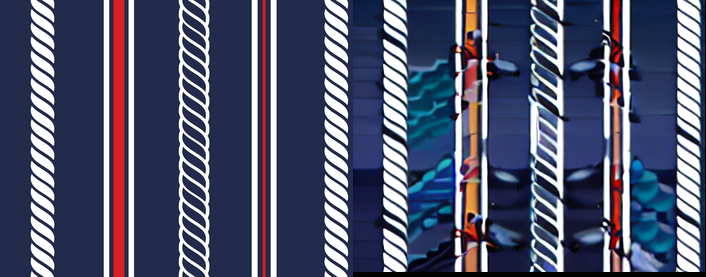

In [29]:
from PIL import Image
import io

image_path = r"C:\Users\Aditya\Downloads\76565.jpg"# Update this path

image = Image.open(image_path)

# Specify the new size. For example, to resize to half the original width and height
new_size = (image.width // 6, image.height // 10)

# Resize the image
init_image = image.resize(new_size, Image.ANTIALIAS)

# You can proceed to pass this image to the pipeline
prompt =  """Create variations of the provided  design pattern, capturing the original's artistic style and color scheme. Adapt the design to include new, yet harmonious color combinations, ensuring variant respects the initial pattern's essence and artistic flair.
Aim for diversity while maintaining a cohesive link to the original concept."""
negative_prompt = """ugly, deformed, disfigured, poor details, bad anatomy Do not create plain or monochromatic patterns, avoid clashing colors and simplistic or modern styles that do not match the intricate, traditional, and floral essence of the original artwork."""
# Assuming your pipeline setup is done earlier and here's how you pass the compressed image to it
result_image = pipeline(prompt, negative_prompt=negative_prompt,image=init_image,num_inference_steps=80,strength=0.5).images[0]


make_image_grid([init_image, result_image], rows=1, cols=2)

# print(f"Result image saved at: {save_path}")
# Note: Depending on the setup of your notebook or script environment, you may need to adjust how the final images are displayed.


In [30]:
save_path = r"C:\Users\Aditya\Downloads\output_images\result_image8.jpg"  # Specify the path where you want to save the image
result_image.save(save_path)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_12772\4197991456.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  init_image = image.resize(new_size, Image.ANTIALIAS)
100%|██████████| 160/160 [02:09<00:00,  1.24it/s]


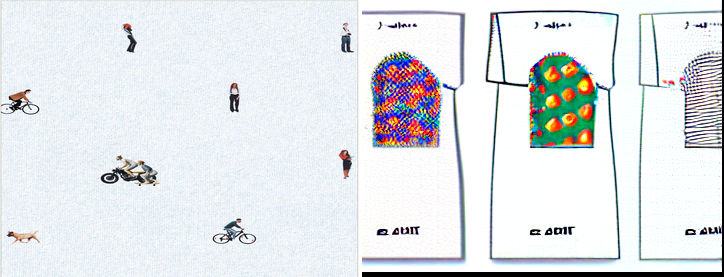

In [20]:
from PIL import Image
import io

image_path = r"C:\Users\Aditya\Downloads\PRINT PAGE-NC2406.jpg"# Update this path

image = Image.open(image_path)

# Specify the new size. For example, to resize to half the original width and height
new_size = (image.width // 6, image.height // 10)

# Resize the image
init_image = image.resize(new_size, Image.ANTIALIAS)

# You can proceed to pass this image to the pipeline
prompt = """Create variations of the provided shirt design pattern, capturing the original's artistic style and color scheme. Adapt the design to include new, yet harmonious color combinations, ensuring variant respects the initial pattern's essence and artistic flair.
Aim for diversity while maintaining a cohesive link to the original concept.output image should look like Input image"""

# Assuming your pipeline setup is done earlier and here's how you pass the compressed image to it
result_image = pipeline(prompt, image=init_image,num_inference_steps=200).images[0]


make_image_grid([init_image, result_image], rows=1, cols=2)


# Note: Depending on the setup of your notebook or script environment, you may need to adjust how the final images are displayed.


C:\Users\Aditya\AppData\Local\Temp\ipykernel_25804\979084811.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  init_image = image.resize(new_size, Image.ANTIALIAS)
100%|██████████| 40/40 [00:26<00:00,  1.49it/s]


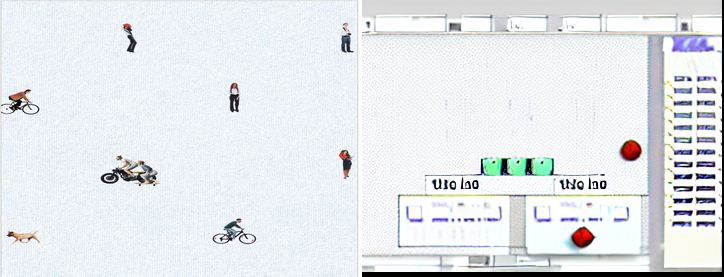

In [6]:
from PIL import Image
import io

image_path = r"C:\Users\Aditya\Downloads\PRINT PAGE-NC2406.jpg"# Update this path

image = Image.open(image_path)

# Specify the new size. For example, to resize to half the original width and height
new_size = (image.width // 6, image.height // 10)

# Resize the image
init_image = image.resize(new_size, Image.ANTIALIAS)

# You can proceed to pass this image to the pipeline
prompt = """create a similar image to input image """

# Assuming your pipeline setup is done earlier and here's how you pass the compressed image to it
result_image = pipeline(prompt, image=init_image).images[0]


make_image_grid([init_image, result_image], rows=1, cols=2)


# Note: Depending on the setup of your notebook or script environment, you may need to adjust how the final images are displayed.


In [5]:
save_path = r"C:\Users\Aditya\Downloads\output_images\result_image3.jpg"  # Specify the path where you want to save the image
result_image.save(save_path)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_12772\1966295104.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  init_image = image.resize(new_size, Image.ANTIALIAS)
100%|██████████| 400/400 [04:22<00:00,  1.52it/s]


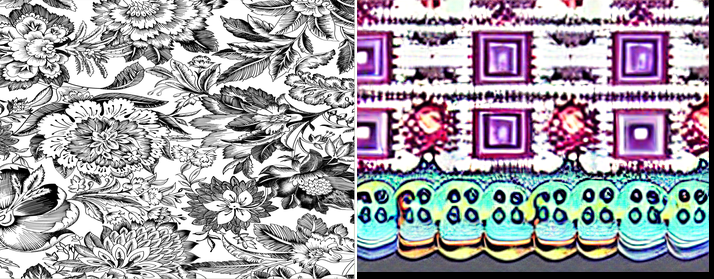

In [24]:
from PIL import Image
import io

image_path = r"C:\Users\Aditya\Downloads\PRINT PAGE-N1S046.jpg"# Update this path

image = Image.open(image_path)

# Specify the new size. For example, to resize to half the original width and height
new_size = (image.width // 6, image.height // 10)

# Resize the image
init_image = image.resize(new_size, Image.ANTIALIAS)

# You can proceed to pass this image to the pipeline
prompt = """Generate diverse variations of the given  pattern, matching its style and colors while introducing new, compatible color schemes."""

# Assuming your pipeline setup is done earlier and here's how you pass the compressed image to it
result_image = pipeline(prompt, image=init_image,num_inference_steps=500).images[0]


make_image_grid([init_image, result_image], rows=1, cols=2)


# Note: Depending on the setup of your notebook or script environment, you may need to adjust how the final images are displayed.


In [13]:
from PIL import Image

image_path = r"C:\Users\Aditya\Downloads\wetransfer_untitled-transfer_2024-04-03_1102\76565.jpg"# Update this path

image = Image.open(image_path)

# Specify the new size. For example, to resize to half the original width and height
new_size = (image.width // 6, image.height // 10)

# Resize the image
init_image = image.resize(new_size, Image.ANTIALIAS)

prompt = '''Create variations of the provided shirt design pattern, capturing the original's artistic style and color scheme. Adapt the design to include new, yet harmonious color combinations, ensuring variant respects the initial pattern's essence and artistic flair. 
Aim for diversity while maintaining a cohesive link to the original concept'''

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
  0%|          | 0/40 [00:00<?, ?it/s]

c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 40/40 [00:28<00:00,  1.40it/s]


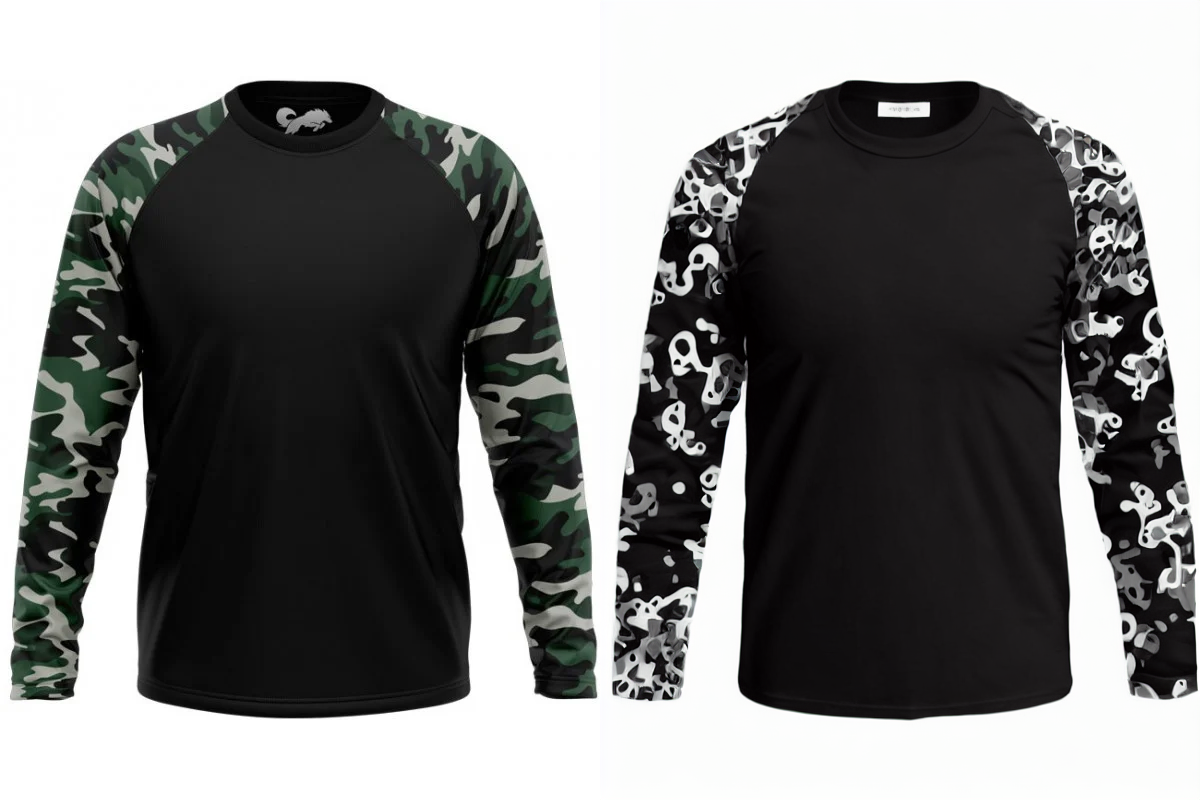

In [4]:
from PIL import Image


image_path = r"C:\Users\Aditya\Downloads\image (2).png"# Update this path


init_image = Image.open(image_path)

prompt = '''change the  color of the t-shirt while maintaining the pattern of the t-shirt and provide an image with a white background it should only focus on the t-shirt no need for men wearing the t-shirt 
keep in mind that output should contain similar patterns and essence '''

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

Token indices sequence length is longer than the specified maximum sequence length for this model (115 > 77). Running this sequence through the model will result in indexing errors


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['without the use of any harsh lines or bright, contrasting colors. the shirt should be placed on a white background with a similar pattern which i provide in the image and describe in a prompt.']
100%|██████████| 40/40 [00:22<00:00,  1.75it/s]


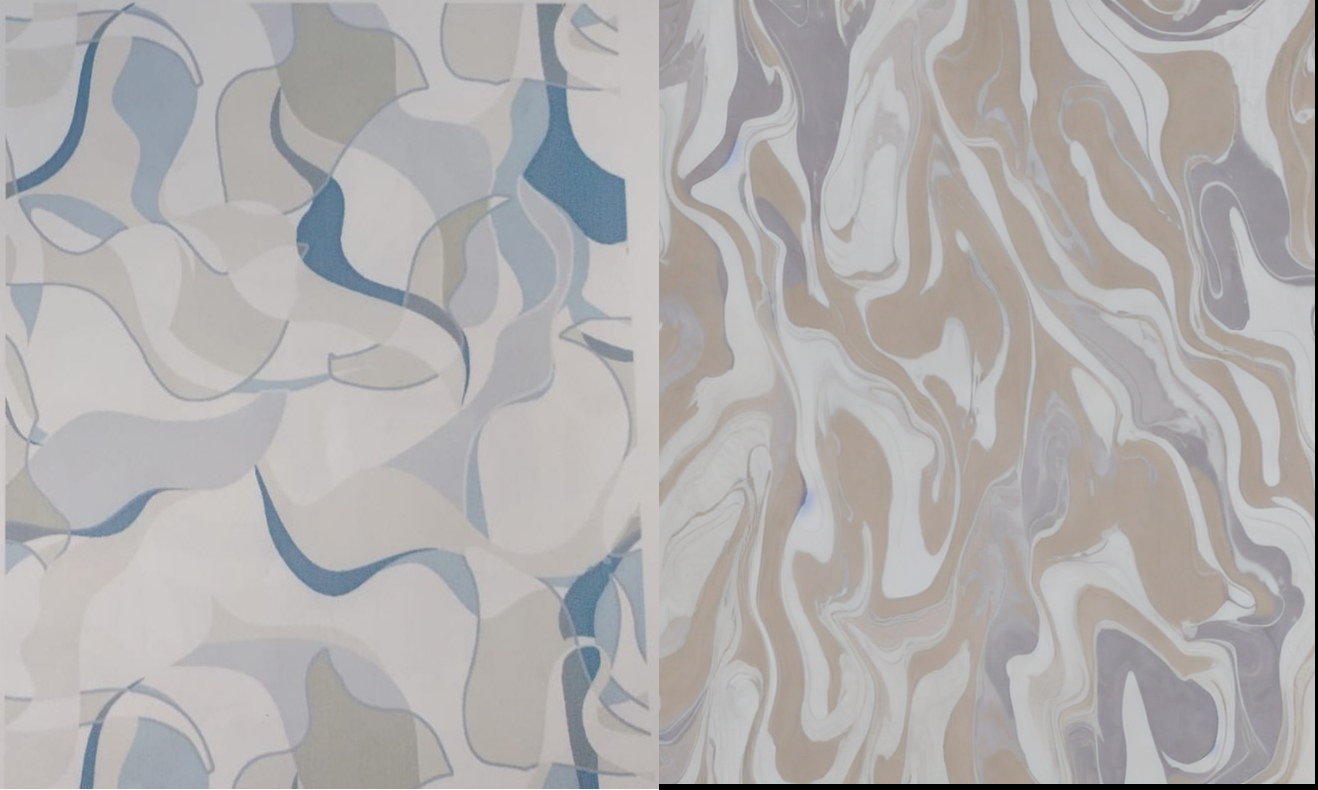

In [8]:
image_path = r"C:\Users\Aditya\Downloads\WhatsApp Imag2024-03-18 at 09.58.42_96ddb611.jpg"# Update this path


init_image = Image.open(image_path)

prompt = '''A shirt featuring a subtle and organic pattern that mimics the flowing lines and interlocking shapes found in natural stone veining or marbled paper. The color palette should be composed of soft, muted tones of pale brown and beige, with the design conveying a sense of soft movement and seamless transitions between the shapes. The overall look should evoke a serene, earthy aesthetic, without the use of any harsh lines or bright, contrasting colors.
the shirt should be placed on a white background with a similar pattern which I provide in the image and describe in a prompt .'''

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 40/40 [19:17<00:00, 28.95s/it]


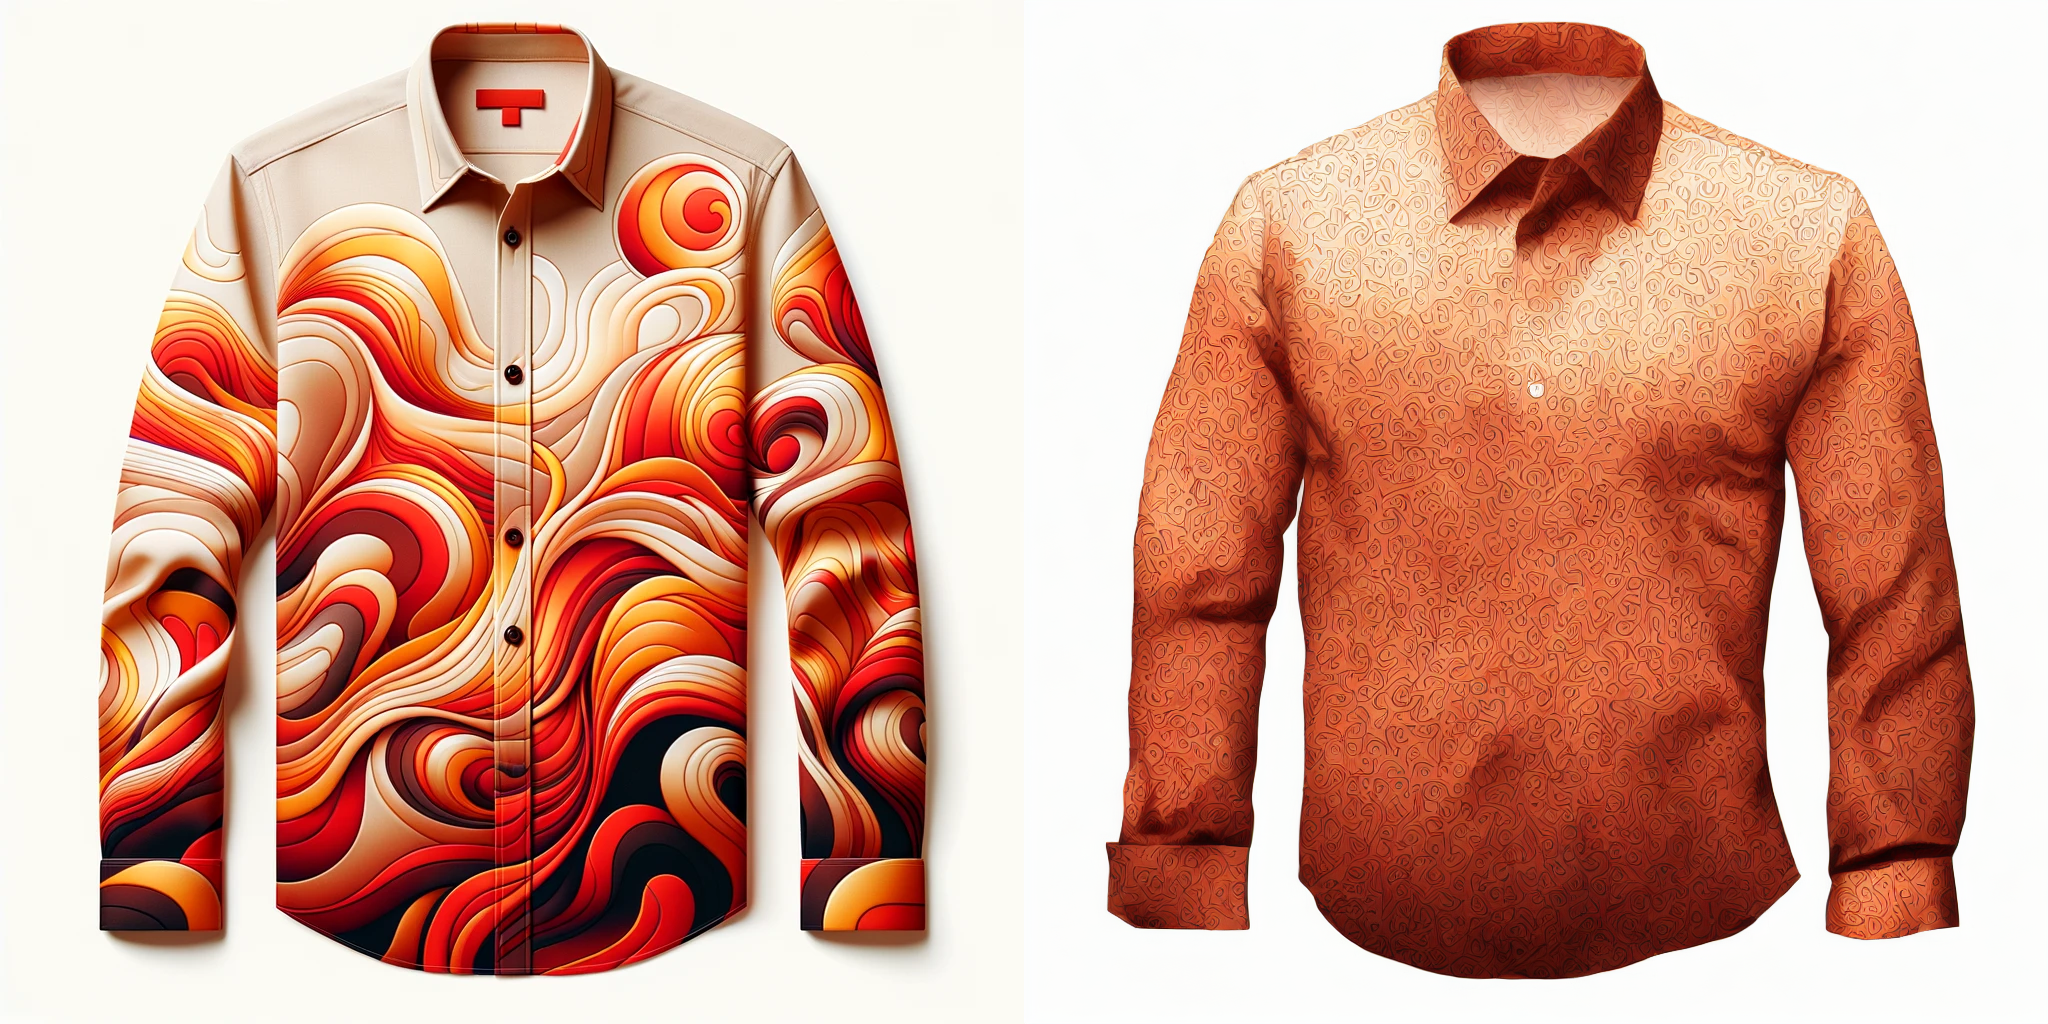

In [5]:
from PIL import Image
image_path = r"C:\Users\Aditya\Downloads\DALL·E 2024-03-28 16.49.21.png"# Update this path


init_image = Image.open(image_path)

prompt = '''change the  color of the shirt while maintaining the pattern of the shirt and provide an image with a white background it should only focus on the shirt no need for men wearing the shirt 
keep in mind that output should contain similar patterns  and it should look similar to input image 4k'''

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

#  Kandinsky 2.2

In [2]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

# prepare image


c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Loading pipeline components...: 100%|██████████| 6/6 [00:12<00:00,  2.02s/it]


In [3]:
from PIL import Image
import io



image_path = r"C:\Users\Aditya\Downloads\PRINT PAGE-N1S046.jpg"# Update this path

image = Image.open(image_path)

# Specify the new size. For example, to resize to half the original width and height
new_size = (image.width // 6, image.height // 10)

# Resize the image
init_image = image.resize(new_size, Image.ANTIALIAS)

prompt = '''Create variations of the provided shirt design pattern, capturing the original's artistic style and color scheme. Adapt the design to include new, yet harmonious color combinations, ensuring variant respects the initial pattern's essence and artistic flair.
Aim for diversity while maintaining a cohesive link to the original concept.output image should look like Input image'''

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_23980\3914585636.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  init_image = image.resize(new_size, Image.ANTIALIAS)


: 